# Import

In [4]:
import matplotlib.pyplot as plt
import torch

import classifier_f_test

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

# Create Test Case

In [28]:
test = classifier_f_test.classifierFTest(use_gpu=True)

# Prepare Dataset

In [29]:
test.create_data_loaders()

# Visualize Dataset

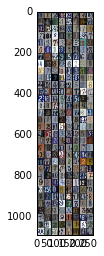

In [23]:
test.visualize_single_batch()

# Create Model

In [30]:
test.create_model()
print(test.model)

F (
  (classify): Sequential (
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU (inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU (inplace)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (5): ReLU (inplace)
    (6): Conv2d(256, 128, kernel_size=(2, 2), stride=(1, 1))
    (7): ReLU (inplace)
    (8): Flatten (
    )
    (9): Linear (128 -> 10)
  )
)


# Create Loss Function

In [31]:
test.create_loss_function()

# Create Optimizer

In [32]:
test.create_optimizer()

# Train

In [ ]:
kwargs = {}
test.train_model(num_epochs=40, **kwargs)

# Save Model

## Checkpoint name

In [23]:
checkpoint_name='checkpoint.tar'

## Save model

In [24]:
torch.save(test.log,checkpoint_name)

## Load model

In [25]:
log=torch.load(checkpoint_name)
model=log['best_model']
test.model = model

# Test Model

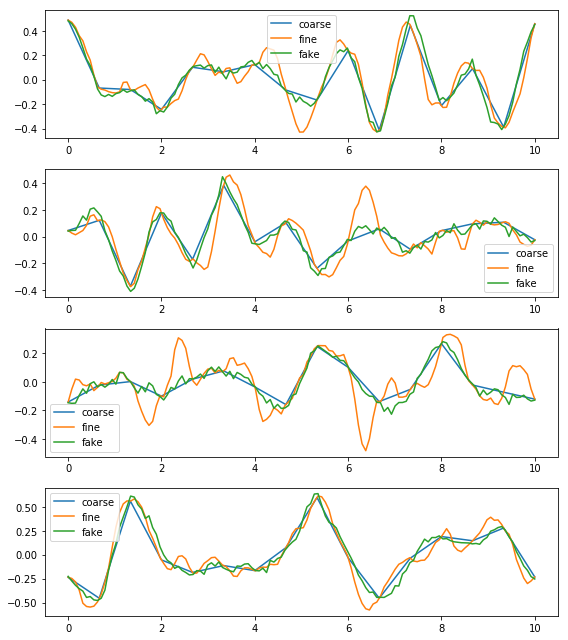

In [26]:
test.test_model()

# Show Loss

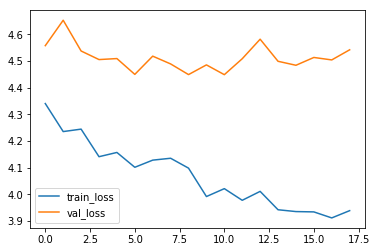

In [27]:
plt.plot(log['train_loss'][2:],label='train_loss')
plt.plot(log['val_loss'][2:],label='val_loss')
plt.legend()
plt.show()